<a href="https://colab.research.google.com/github/quotation3/DB_Finance/blob/main/LSTM/11_LSTM_%EC%82%BC%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
news = pd.read_csv('/content/drive/MyDrive/DB_Finance/data/lg_chemical_only_topic.csv',lineterminator='\n')
news

,Unnamed: 0,date,title,content,change,have_topic,nouns
0,0,2017-01-02,"中, 한국산 배터리 탑재차 보조금 제외…LG화학·삼성SDI '날벼락'","中, 한국산 배터리 탑재차 보조금 제외…LG화학·삼성SDI '날벼락' 중국 정부가 ...",-3.07,1,"['中', '한국', '배터리', '탑', '보조금', '제외', '화학', '삼성..."
1,1,2017-01-02,[리더십 4.0시대]2016년 1년간 분석한 '4차 산업혁명' 리더 경영인은 누굴까,[리더십 4.0시대]2016년 1년간 분석한 '4차 산업혁명' 리더 경영인은 누굴까...,-3.07,1,"['리더십', '시대', '년', '년', '간', '분석', '차', '산업', ..."
2,2,2017-01-02,"구본무 회장, ""창립 70년 맞은 올해 새롭게 시작하자""","구본무 회장, ""창립 70년 맞은 올해 새롭게 시작하자"" [구 회장, LG 그룹 신...",-3.07,1,"['구본무', '회장', '창립', '년', '올해', '시작', '회장', '그룹..."
3,3,2017-01-02,한국산 ‘車 배터리’ 中서 설 자리 잃나…장착 차량 보조금도 제외,한국산 ‘車 배터리’ 中서 설 자리 잃나…장착 차량 보조금도 제외 중국의 한국산 전...,-3.07,1,"['한국', '車', '배터리', '中', '설', '자리', '장착', '차량',..."
4,4,2017-01-02,"LG, 1회 충전으로 24시간 사용 노트북 시판","LG, 1회 충전으로 24시간 사용 노트북 시판[동아일보] LG전자는 한 번 충전해...",-3.07,1,"['회', '충전', '시간', '사용', '노트북', '시판', '동아일보', '..."
...,...,...,...,...,...,...,...
7455,7455,2019-12-30,‘화학놀이터’·‘화학캠프’로 과학교육 기부,‘화학놀이터’·‘화학캠프’로 과학교육 기부 [사회공헌 특집]LG화학은 유엔이 정한 ...,2.25,1,"['화학', '놀이터', '화학', '캠프', '과학', '교육', '기부', '사..."
7456,7456,2019-12-30,"'中 배터리 1위' CATL, 시가총액 38조원 돌파","'中 배터리 1위' CATL, 시가총액 38조원 돌파세계 최대 배터리 제조사인 중국...",2.25,1,"['中', '배터리', '위', '시가총액', '조', '원', '돌파', '세계'..."
7457,7457,2019-12-30,"LG전자, 폴란드 브로츠와프에 배터리 분리막 공장 증설","LG전자, 폴란드 브로츠와프에 배터리 분리막 공장 증설LG전자가 폴란드 브로츠와프에...",2.25,1,"['전자', '폴란드', '브로츠와프', '배터리', '분리', '막', '공장',..."
7458,7458,2019-12-30,[2019 결산-산업 ⑩] 소송에다 ESS 화재까지…다사다난 배터리업계,[2019 결산-산업 ⑩] 소송에다 ESS 화재까지…다사다난 배터리업계 국내 배터리...,2.25,1,"['결산', '산업', '소송', '화재', '다사다난', '배터리', '업계', ..."


In [ ]:
news['label']=''
for i in range(len(news)):
    if news['change'][i]>=2:
        news['label'][i] = 1
    elif news['change'][i]<-2:
        news['label'][i] = -1
    else:
        news['label'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
news['text']=news['title']+news['content']

In [ ]:
news = news[['date','text','label']]

In [ ]:
news.dropna(inplace=True)
news.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sentence = []
for i in range(len(news)):
    sentence.append(sent_tokenize(news['text'][i]))

In [ ]:

split = pd.DataFrame(sentence)
split

In [ ]:
# split = news.text.str.split('.')
# split

In [ ]:
# split = split.apply(lambda x: pd.Series(x))
# split

In [ ]:
split.stack().reset_index(level=1, drop=True)

0       中, 한국산 배터리 탑재차 보조금 제외…LG화학·삼성SDI '날벼락'中, 한국산 배...
0       실제로 이번에 보조금 대상으로 지정된 493개 모델 중 50여 개 전기차는 규범 인...
0       중국 정부는 지난달 30일 항공사 3곳이 신청한 8개 노선의 중국발 한국행 전세기 ...
0        운항이 불허된 노선은 제주항공 6개 노선과 아시아나 항공과 진에어 각각 1개 노선이다.
0             명확한 설명도 없이 불허한 것이어서 사드가 불허의 원인이라는 해석이 유력하다.
                              ...                        
7451    그 역시 24년을 집권해온 독재자였다.샤넬의 수석디자이너로 패션계의 ‘살아 있는 전...
7451    1955년 피에르 발망에서 어시스턴트로 일하며 패션 업계에 발을 들인 그는 1983...
7451    8월5일 세상을 떠난 미국 작가 토니 모리슨은 흑인 여성으로는 처음으로 1993년 ...
7451                주로 미국 사회 흑인들의 삶을 여성적인 시각에서 다룬 작품을 썼다.
7451    소설 (1987년)로 퓰리처상을 받았다.정유미·김향미·황민국·배문규·심진용·©경향신...
Length: 106378, dtype: object

In [ ]:
split = split.stack().reset_index(level=1, drop=True).to_frame('sentence')
split

,sentence
0,"中, 한국산 배터리 탑재차 보조금 제외…LG화학·삼성SDI '날벼락'中, 한국산 배..."
0,실제로 이번에 보조금 대상으로 지정된 493개 모델 중 50여 개 전기차는 규범 인...
0,중국 정부는 지난달 30일 항공사 3곳이 신청한 8개 노선의 중국발 한국행 전세기 ...
0,운항이 불허된 노선은 제주항공 6개 노선과 아시아나 항공과 진에어 각각 1개 노선이다.
0,명확한 설명도 없이 불허한 것이어서 사드가 불허의 원인이라는 해석이 유력하다.
...,...
7451,그 역시 24년을 집권해온 독재자였다.샤넬의 수석디자이너로 패션계의 ‘살아 있는 전...
7451,1955년 피에르 발망에서 어시스턴트로 일하며 패션 업계에 발을 들인 그는 1983...
7451,8월5일 세상을 떠난 미국 작가 토니 모리슨은 흑인 여성으로는 처음으로 1993년 ...
7451,주로 미국 사회 흑인들의 삶을 여성적인 시각에서 다룬 작품을 썼다.


In [ ]:
news = news.merge(split, left_index=True, right_index=True, how='left')

In [ ]:
news = news[['date','sentence','label']]
# news = news[['date','title','label']]
# news.columns = ['date','sentence','label']

In [ ]:
news

,date,sentence,label
0,2017-01-02,"中, 한국산 배터리 탑재차 보조금 제외…LG화학·삼성SDI '날벼락'中, 한국산 배...",-1
0,2017-01-02,실제로 이번에 보조금 대상으로 지정된 493개 모델 중 50여 개 전기차는 규범 인...,-1
0,2017-01-02,중국 정부는 지난달 30일 항공사 3곳이 신청한 8개 노선의 중국발 한국행 전세기 ...,-1
0,2017-01-02,운항이 불허된 노선은 제주항공 6개 노선과 아시아나 항공과 진에어 각각 1개 노선이다.,-1
0,2017-01-02,명확한 설명도 없이 불허한 것이어서 사드가 불허의 원인이라는 해석이 유력하다.,-1
...,...,...,...
7451,2019-12-30,그 역시 24년을 집권해온 독재자였다.샤넬의 수석디자이너로 패션계의 ‘살아 있는 전...,1
7451,2019-12-30,1955년 피에르 발망에서 어시스턴트로 일하며 패션 업계에 발을 들인 그는 1983...,1
7451,2019-12-30,8월5일 세상을 떠난 미국 작가 토니 모리슨은 흑인 여성으로는 처음으로 1993년 ...,1
7451,2019-12-30,주로 미국 사회 흑인들의 삶을 여성적인 시각에서 다룬 작품을 썼다.,1


In [ ]:
news[news['label']==0]

,date,sentence,label
57,2017-01-05,"<보호무역장벽, 신시장으로 뚫어라>한화 “防産산업, 2020년 중반까지 글로벌 10...",0
57,2017-01-05,활발한 인수·합병(M&A)을 통해 국내 최고의 방산회사 입지를 다진 한화그룹은 방산...,0
57,2017-01-05,한화그룹은 오는 2020년 중반까지 방산산업을 글로벌 10위권으로 키운다는 목표를 ...,0
57,2017-01-05,"현재 글로벌 방산업계는 록히드마틴, 보잉 등 미국 회사들이 주도하고 있다.",0
57,2017-01-05,우리나라는 전 세계 10위권의 군사대국이면서도 글로벌 상위 방산회사를 배출하지 못했...,0
...,...,...,...
7442,2019-12-27,"유료방송 독과점 논란이 해소되며 SK브로드밴드-티브로드 합병(기업가치 5조원), L...",0
7442,2019-12-27,지주사 규제 해소를 위한 롯데지주의 롯데카드·손보 매각도 있었다.,0
7442,2019-12-27,"선택과 집중을 위해 아시아나항공, 대우조선해양, SK네트웍스 직영주유소, SKC코오...",0
7442,2019-12-27,"배달의민족, 닥터자르트, 커피빈, 수아랩 등이 해외 투자자에게 매각된 주요 사례다....",0


In [ ]:
df=news

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.columns=['date','document','label']

In [ ]:
train_data = df[df['date']<'2019-09-01']
test_data = df[df['date']>='2019-09-01']

In [ ]:
train_data.drop_duplicates(subset=['document'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


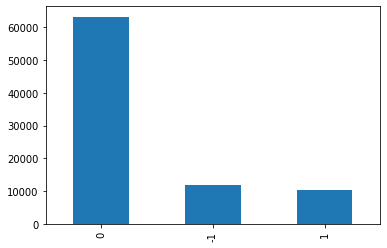

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0     -1  11902
1      0  63277
2      1  10380


In [ ]:
print(train_data.isnull().values.any())

False


In [ ]:
print(train_data.isnull().sum())

date        0
document    0
label       0
dtype: int64


In [ ]:
train_data.loc[train_data.document.isnull()]

,date,document,label


In [ ]:
train_data = train_data.dropna(how = 'any')

In [ ]:
print(train_data.isnull().values.any())

False


In [ ]:
print(len(train_data))

85559


In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
train_data['document'].replace('', np.nan, inplace=True)
train_data['document'].replace('"', '', inplace=True)
print(train_data.isnull().sum())

date         0
document    62
label        0
dtype: int64


In [ ]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data['document'].replace('"', '', inplace=True)
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 17087


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="C:\Program Files\Java\jdk1.8.0_281"

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
X_train = []
for sentence in train_data['document']:
    try:
        temp_X = []
        temp_X = okt.morphs(sentence, stem=True) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)
    except:
        pass

In [ ]:
len(X_train)

85497

In [ ]:
X_test = []
for sentence in test_data['document']:
    try:
        temp_X = []
        temp_X = okt.morphs(sentence, stem=True) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    except:
        pass

In [ ]:
len(X_test)

17087

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index)

{'을': 1, '있다': 2, '등': 3, '되다': 4, '이다': 5, '로': 6, '에서': 7, '화학': 8, '것': 9, '년': 10, '배터리': 11, '적': 12, '인': 13, '사업': 14, '수': 15, '하고': 16, '기업': 17, '일': 18, '중국': 19, '다': 20, '시장': 21, '전기차': 22, '투자': 23, '전': 24, '생산': 25, '기술': 26, '산업': 27, '업체': 28, '그룹': 29, '국내': 30, '위': 31, '돼다': 32, '월': 33, '한국': 34, '까지': 35, '공장': 36, '성': 37, '말': 38, '장': 39, '제': 40, '전자': 41, '만': 42, '개발': 43, '업계': 44, '지난해': 45, '회장': 46, '따르다': 47, '고': 48, '올해': 49, '억원': 50, '부회장': 51, '자동차': 52, '정부': 53, '않다': 54, '소재': 55, '보다': 56, '제품': 57, '삼성': 58, '개': 59, '글로벌': 60, '받다': 61, '미국': 62, '에는': 63, '부터': 64, '원': 65, '규모': 66, '오다': 67, '중': 68, '대': 69, '형': 70, '화': 71, '위해': 72, '및': 73, '통해': 74, '지': 75, '이라고': 76, '계획': 77, '없다': 78, '지난': 79, '명': 80, '세계': 81, '관계자': 82, '밝히다': 83, '바이오': 84, '대한': 85, '확대': 86, '공급': 87, '매출': 88, '성장': 89, '차': 90, '신': 91, '분야': 92, '약': 93, '시': 94, '이노베이션': 95, '관련': 96, '최근': 97, '늘다': 98, '일본': 99, '구': 100, '내': 101, '대표': 102, '롯데':

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 32633
등장 빈도가 2번 이하인 희귀 단어의 수: 13786
단어 집합에서 희귀 단어의 비율: 42.24557962798394
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7530333237203198


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 18849


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[222, 12, 408, 91, 198, 460, 9, 59, 16471, 222, 12, 408, 91, 198, 460, 9, 59, 16471, 20, 54, 222, 12, 40, 1240, 23, 43, 198, 220, 8, 460, 19, 12, 45, 48, 80, 1573, 20, 54, 9, 59, 12, 196, 23, 60, 259, 2, 198, 220, 440, 10579, 447, 3308, 20, 54, 209, 323, 198, 183, 133, 814, 60, 23, 259, 163, 198, 2, 384, 222, 12, 425, 60, 259, 43, 198, 384, 2, 3308, 198, 220, 8, 460, 5, 7851, 53, 427, 246, 2340, 2152, 8089, 1175, 2797, 9687, 13649, 1175, 53, 60, 259, 4, 60, 259, 9, 12, 196, 17, 3, 6329, 53, 427, 246, 2340, 59, 12, 40, 1240, 259, 6, 20, 23, 198, 219, 539, 31, 29, 1774, 226, 23, 12, 4801, 597, 1759, 10080, 79], [482, 7, 124, 198, 220, 1164, 5, 60, 259, 69, 264, 60, 23, 4801, 597, 2, 62, 226, 29, 171, 12, 40, 1240, 10, 373, 45, 133, 124, 20, 54, 499, 35, 298, 1487, 1718, 602, 808, 326, 86, 122, 509, 499, 513, 1448, 180, 3, 9, 80, 11, 34, 1318, 23, 438, 67, 12, 37, 2, 769, 59, 2617, 23, 438, 67, 37, 2, 2934, 503, 3, 20, 54, 3741, 13, 14, 222, 58, 14820, 476, 24, 252, 86, 375, 1861, 45, 83

In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

85470
85532


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


기사의 최대 길이 : 2164
기사의 평균 길이 : 27.993330993330993


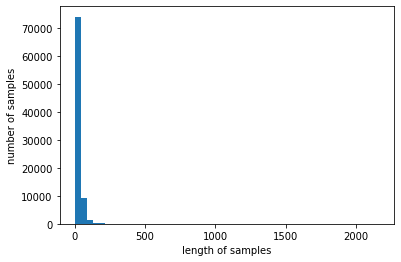

In [ ]:
print('기사의 최대 길이 :',max(len(l) for l in X_train))
print('기사의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 45
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 45 이하인 샘플의 비율: 87.35696735696735


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
X_train=np.asarray(X_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/10
1140/1140 [==============================] - 126s 108ms/step - loss: 0.0000e+00 - acc: 0.7013 - val_loss: 0.0000e+00 - val_acc: 0.8748

Epoch 00001: val_acc improved from -inf to 0.87481, saving model to best_model.h5
Epoch 2/10
1140/1140 [==============================] - 120s 106ms/step - loss: 0.0000e+00 - acc: 0.7044 - val_loss: 0.0000e+00 - val_acc: 0.8748

Epoch 00002: val_acc did not improve from 0.87481
Epoch 3/10
1140/1140 [==============================] - 121s 106ms/step - loss: 0.0000e+00 - acc: 0.7036 - val_loss: 0.0000e+00 - val_acc: 0.8748

Epoch 00003: val_acc did not improve from 0.87481
Epoch 4/10
1140/1140 [==============================] - 121s 106ms/step - loss: 0.0000e+00 - acc: 0.7034 - val_loss: 0.0000e+00 - val_acc: 0.8748

Epoch 00004: val_acc did not improve from 0.87481
Epoch 5/10
1140/1140 [==============================] - 121s 106ms/step - loss: 0.0000e+00 - acc: 0.7042 - val_loss: 0.0000e+00 - val_acc: 0.8748

Epoch 00005: val_acc did not impr

In [ ]:
X_test=np.asarray(X_test).astype(np.int)
y_test=np.asarray(y_test).astype(np.int)

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

534/534 [==============================] - 9s 16ms/step - loss: 0.0000e+00 - acc: 0.8559

 테스트 정확도: 0.8559


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 기사입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 기사입니다.\n".format((1 - score) * 100))